<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Question: How does consumer buying effect the carbon footprint of consumer industries?

In [34]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/SupplyChainEmissions.csv')

df = df.drop(columns=['Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions',
    '2017 NAICS Code': 'NAICS Code'
}, inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAICS Code            1016 non-null   int64  
 1   Industry              1016 non-null   object 
 2   GHG                   1016 non-null   object 
 3   Unit                  1016 non-null   object 
 4   Emissions_No_Margins  1016 non-null   float64
 5   Margins               1016 non-null   float64
 6   Total_Emissions       1016 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 55.7+ KB


Basic viewing of industry emission scale

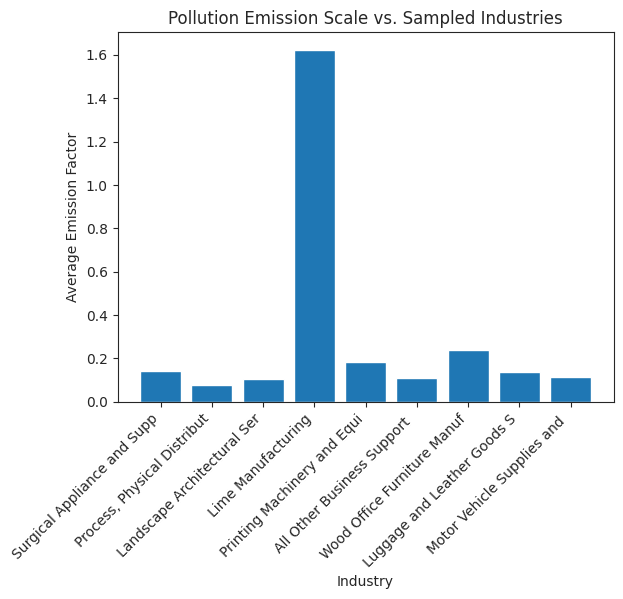

In [41]:

import matplotlib.pyplot as plt




sample_df = df.sample(9)
x = sample_df['Industry']
y = sample_df['Total_Emissions']



plt.bar(x.str[:27],
        y,
        label="Pollution Emission Scale vs. Industry")
plt.xlabel("Industry")
plt.ylabel('Average Emission Factor')
plt.title("Pollution Emission Scale vs. Sampled Industries")
plt.xticks(rotation=45, ha="right")
plt.show()

Mapping data to fit research question through categories

In [38]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'

# filtering of industries (2017 naics title) to create specific categories that are usable for project
keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Electricity', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing', 'Gas'],
    'Food, Farming, & Beverages': ['Farm', 'Food', 'Beverage', 'Alcohol', 'Snack', 'Fish', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery', 'Restaurant', 'Tortilla', 'Corn', 'Farming', 'Dining', 'Flour', 'Pasta', 'Bakery', 'Bakeries', 'Convenience'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Taxi', 'Airplane', 'Car', 'Train', 'Bus', 'Transport'],
    'Fashion': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear', 'Fashion', 'Designer', 'Jewelry'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary', 'Vet', 'Safety', 'Ambulance', 'Clinic', 'Medicine'],
    'Entertainment / Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture', 'Movie', 'TV', 'Gambling', 'Casino', 'Game', 'Sports', 'Gaming', 'Theatre', 'Park'],
    'Financial & Organization Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing', 'Claims', 'Loan', 'Brokers', 'Trust', 'Court', 'Financial', 'Consulting'],
    'Manufacturing and Development': ['Manufacturing', 'Engineering', 'Corperate', 'Production', 'Extraction', 'Fuel', 'Development', 'Research', 'Refining', 'Internet']
}

# Loops through all industries, searches and finds matching keywords, creates a boolean mask, and then assigns it to one of the above categories.
for category, keywords in keywords_map.items():
    sortdef = r'\b(' + '|'.join(keywords) + r')\b'
    bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
    df_consumer.loc[bmask, 'Consumer Category'] = category


# --> samples data for proofing and checking
print("number of industries assigned to each category:")
print(df_consumer['Consumer Category'].value_counts())

print("\nsample of mapped industries:")
print(df_consumer[['Industry', 'Consumer Category']].sample(10))

number of industries assigned to each category:
Consumer Category
Other                                466
Manufacturing and Development        315
Food, Farming, & Beverages            58
Financial & Organization Services     42
Housing & Utilities                   35
Transportation                        30
Fashion                               26
Entertainment / Recreation            23
Healthcare                            21
Name: count, dtype: int64

sample of mapped industries:
                                              Industry  \
94                         Sewage Treatment Facilities   
813                              Media Buying Agencies   
360          Optical Instrument and Lens Manufacturing   
479                                 Sign Manufacturing   
747                           Health and Welfare Funds   
313  Other Nonferrous Metal Foundries (except Die-C...   
750               Trusts, Estates, and Agency Accounts   
834                      Document Preparation

/tmp/ipython-input-998325912.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-998325912.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-998325912.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-998325912.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-998325912.py:23: UserWarning: Thi

Creating a prototype bar plot to display carbon footprint in each created category

/tmp/ipython-input-938126296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')


\ghg emissions by consumer spending category:
Consumer Category
Food, Farming, & Beverages           0.573810
Manufacturing and Development        0.340860
Housing & Utilities                  0.282571
Transportation                       0.263500
Other                                0.243414
Fashion                              0.238846
Entertainment / Recreation           0.119348
Healthcare                           0.116429
Financial & Organization Services    0.074524
Name: Total_Emissions, dtype: float64


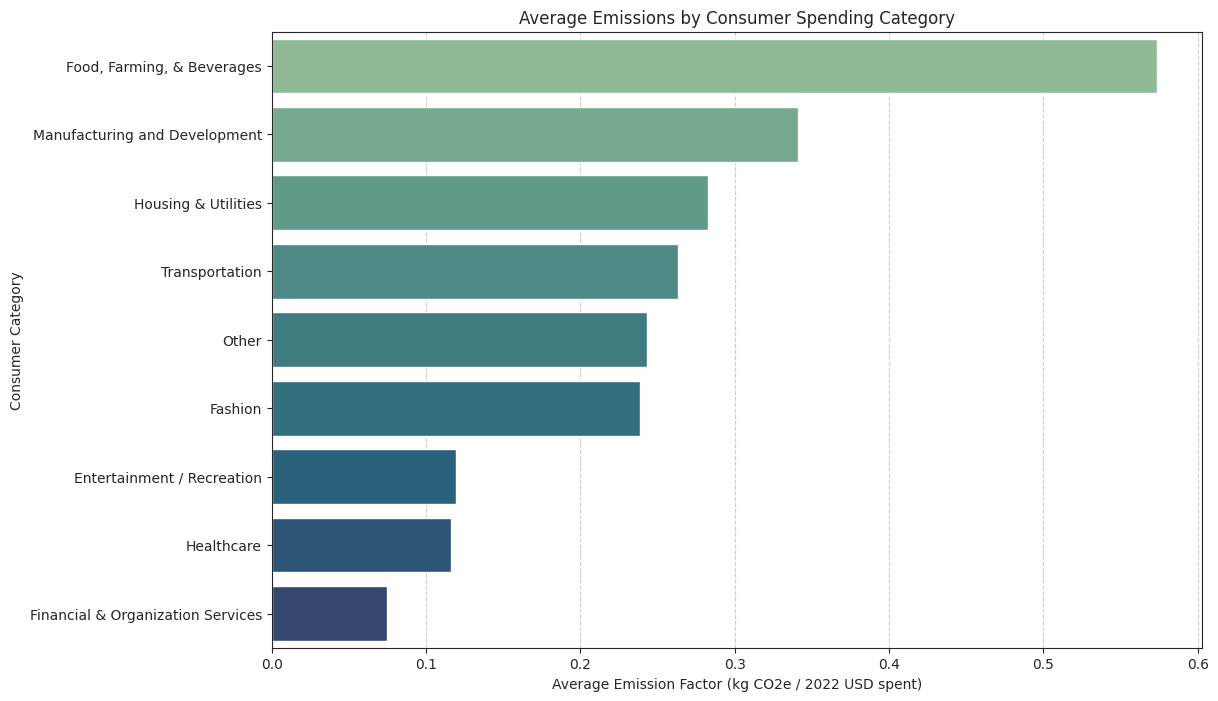

In [39]:
import seaborn as sns

# average emission factor for each consumer categ
emission_factor_avg = df_consumer.groupby('Consumer Category')['Total_Emissions'].mean().sort_values(ascending=False)

print("\ghg emissions by consumer spending category:")
print(emission_factor_avg)


sns.set_style('ticks')
plt.figure(figsize=(12, 8))
sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')
plt.title('Average Emissions by Consumer Spending Category')
plt.xlabel('Average Emission Factor (kg CO2e / 2022 USD spent)')
plt.ylabel('Consumer Category')
plt.grid(axis='x', linestyle='--')
plt.show()

In [40]:
# I'm importing another dataset with the same industries in order to see the exports value connected to industries

import pandas as pd
import matplotlib as plt
pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')

exports_df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')

print(exported_df.head())
print("-------")
print(df_consumer.head())
exported_df = exports_df.drop(df.index[[0, 1,2]])

df_cleaned.info()
df_cleaned = exported_df.dropna(subset=['Total Exports Value ($US)'])

df_cleaned.sample(11)

                          Commodity Total Exports Value ($US)
3            1111 Oilseeds & Grains             3,094,052,185
4                    11111 Soybeans               699,526,766
5                   111110 Soybeans               699,526,766
6   11112 Oilseeds (except Soybean)                15,826,919
7  111120 Oilseeds (except Soybean)                15,826,919
-------
   NAICS Code                          Industry       GHG  \
0      111110                   Soybean Farming  All GHGs   
1      111120  Oilseed (except Soybean) Farming  All GHGs   
2      111130          Dry Pea and Bean Farming  All GHGs   
3      111140                     Wheat Farming  All GHGs   
4      111150                      Corn Farming  All GHGs   

                                Unit  Emissions_No_Margins  Margins  \
0  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
1  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
2  kg CO2e/2022 USD, purchaser price    

,Commodity,Total Exports Value ($US)
371,321999 Miscellaneous Wood Products,"181,878,995"
662,333112 Lawn And Garden Tractor And Home Lawn A...,"96,949,168"
554,327993 Mineral Wool & Glass Fibers,"61,679,123"
718,333613 Mechanical Power Transmission Equipment,"362,347,067"
40,"111422 Fresh Flowers, Seeds & Foliage","7,310,308"
134,21229 Other Metal Ores,"128,527,373"
505,32621 Tires,"403,388,489"
810,3353 Electrical Equipment,"2,360,882,026"
863,336390 Other Motor Vehicle Parts,"1,919,798,966"
664,333120 Construction Machinery,"1,223,260,256"
